# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import norm
import math

df = pd.read_csv('/Users/vickimoore/Desktop/Springboard/EDA_mini-project/EDA_human_temperature/data/human_body_temperature.csv')

In [51]:
#Basic information about how the data are structured.
print(df.info())
print(df.isnull().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None
temperature    0
gender         0
heart_rate     0
dtype: int64
   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


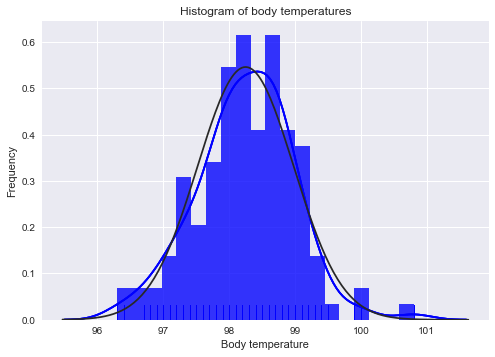

In [158]:
#Are the data normally distributed?
sns.set()
sns.distplot(df['temperature'], color='blue', hist=True, bins=20, fit=norm)
plt.title('Histogram of body temperatures')
plt.xlabel('Body temperature')
plt.ylabel('Frequency')
plt.show()

# Histogram and normal distribution

The body temperature data look mostly normally distributed in nature, but with some irregularities (black curve for normal distribution, and blue for the empirical data distribution). Next is to check the cumulative distribution function (CDF). What follows is an empirical cumulative distribution function versus normalized CDF based on the mean and standard deviation of the sample data.

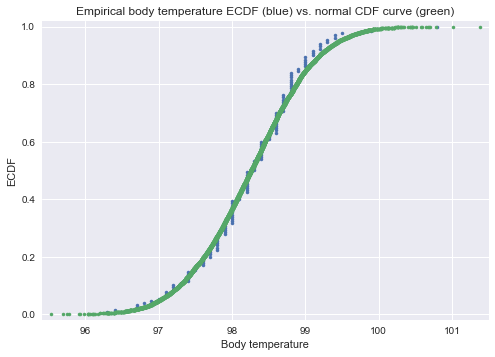

In [61]:
#For building ECDF from empirical data.
x = np.sort(df.temperature)
y = np.arange(1, len(x)+1) / len(x)
plt.plot(x, y, marker='.', linestyle='none')
#For building CDF of normal curve from sample mean and standard deviation.
mean = np.mean(df.temperature)
std = np.std(df.temperature)
norm_sample = np.random.normal(mean, std, size=10000)
x_norm = np.sort(norm_sample)
y_norm = np.arange(1, len(x_norm)+1) / len(x_norm)
plt.plot(x_norm, y_norm, marker='.', linestyle='none')
plt.title('Empirical body temperature ECDF (blue) vs. normal CDF curve (green)')
plt.xlabel('Body temperature')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

# Cumulative distribution function

The empirical sample data, even if they looked a little skewed and irregular in the histogram higher up, 
can be described by a normal distribution when compared to a normal ECDF curve based on the mean and standard 
deviation, more or less. The upper part of the overlay above shows the empirical data to separate from the normal 
distribution, but perhaps this is due to a relatively low number of samples of temperatures in that area. The mean 
and standard deviation bothappear otherwise suitable based on this overlay with the normal cumulative distribution 
curve.

So, what is the sample size? Up above with the info command we can see that n=130. Whether that is small or large 
ultimately depends on both the goals of the study and the difficulty in obtaining data, but all things considered,
this may be considered a small sample. However, in terms of t- vs. z-tests and deciding on which to use, the sample 
size may be considered large. In the tails of both the histogram and the ECDF curve, more samples would possibly fill
in gaps. 

The Central Limit Theorem suggests that an independently sampled variable would tend to lead to data that follow a 
normal distribution. I would consider the empirical ECDf curve here to support that notion of independence.

In [142]:
#Is the mean body temperature really 98.6 F?
print("mean =",mean)
print("standard deviation =",std)

mean = 98.24923076923078
standard deviation = 0.7303577789050377


# Bootstrap hypothesis testing of means

The mean is in the ballpark of 98.6 F, but not actually 98.6; closer to 98.2 F. The rest of this exercise concerns the question of whether it is likely that 98.6 F is a true mean body temperature if this random sample of people has a mean that diverges as we see here.

Let's examine more with bootstrap hypothesis testing to see if these mean differences are significant. Here the null
hypothesis is that the mean body temperature is the widely reported 98.6 F.

In [63]:
#"usual" is the "typical" 98.6 F body temperature.
usual = 98.6
sample_shifted = df.temperature - np.mean(df.temperature) + usual
#test statistic
def diff_from_usual(data, usual=98.6):
    return np.mean(data) - usual
diff_obs = diff_from_usual(df.temperature)
diff_obs 

-0.35076923076921673

The difference (test statistic for the bootstrap hypothesis test) computed above is the difference between 98.6 F and the mean from the temperature column.

In [224]:
#Bootstrap hypothesis testing.
#data = sample_shifted
#func = diff_from_usual
#Here using the test statistic and difference from usual.
def bootstrap_replicate(data, func):
    return func(np.random.choice(data, size=len(data)))
def draw_bs_reps(data, func, size=10000):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate(data, func)
    return bs_replicates
bs_replicates_teststat = draw_bs_reps(sample_shifted, diff_from_usual, len(sample_shifted))
p_value = np.sum(bs_replicates_teststat <= diff_obs) / len(sample_shifted)
print("p:",p_value)

p: 0.0


I am suspicious of the 0.0 p-value, but at this time cannot think of an error. I'll do the frequentist tests and see
how those compare. When looking at the sample_shifted data, there are some that are along the whole spectrum of 
temperatures, for instance, but the null hypothesis relates to the mean. Bootstrap samples below are showing a 
mean below 98.3 each time I check, depending on random number seed.

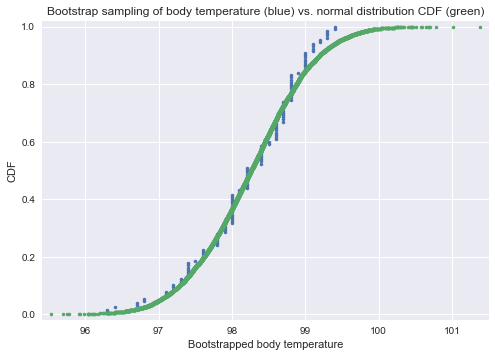

98.21076923076923

In [121]:
np.random.seed(41)
bs_sample = np.random.choice(df.temperature, size=130)
np.mean(bs_sample)
x_bs = np.sort(bs_sample)
y_bs = np.arange(1, len(x_bs)+1) / len(x_bs)
plt.plot(x_bs, y_bs, marker='.', linestyle='none')
plt.plot(x_norm, y_norm, marker='.', linestyle='none')
plt.title('Bootstrap sampling of body temperature (blue) vs. normal distribution CDF (green)')
plt.xlabel('Bootstrapped body temperature')
plt.ylabel('CDF')
plt.margins(0.02)
plt.show()
np.mean(bs_sample)

Bootstrap samples show various degrees of being slightly messier than the raw data do, when not seeded the same way beforehand, but over multiple samplings look similar on average. The bootstrap sample mean always appears much closer to the raw sample mean than to 98.6 F.

# Frequentist statistical testing of the means

Next, the question is whether to perform a t-test or z-test. A z-test is more appropriate when both the two means and standard deviations are known. The t-test is more appropriate when the means, but not necessarily the standard deviations, are known. It is also more desirable for smaller sample sizes, but in the case of this data set, we have two means and only one standard deviation available, so the t-test is appropriate in that regard. However, since the sample size is so much greater than n=30, the sample standard deviation is assumed to resemble the true population standard deviation, which diminishes the concern of not knowing the standard deviation associated with 98.6 F. I will start with calculating the t-statistic.

The null hypothesis is that the sample mean of ~98.2 F is not significantly different from the usually reported mean of 98.6 F. The following tests determine the probability of achieving the sample mean in this study if the true mean is 98.6 F. The t-statistic come from the scipy t-test for one sample, since only one of the sets of data in this comparison is a full dataset with a calculable standard deviation.

In [75]:
#Calculating the t-statistic. 
scipy.stats.ttest_1samp(df.temperature, usual)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [99]:
#A scipy formula for generating a 99.9% confidence interval on the t-statistic.
print((stats.t.ppf(q=0.001, df=(len(df.temperature))-1)), (stats.t.ppf(q=0.999, df=(len(df.temperature))-1)))

-3.15461199216 3.15461199216


The t-statistic falls well outside of this confidence interval, which in addition to the very low p-value, suggests
a genuine difference between the mean of the samples here versus the usually reported 98.6 F. The t-test 
statistic is -5.45, and the p-value is 0.00000024, extremely small. It seems unlikely the mean temperature would have
been the sample mean from this study if the true mean is 98.6 F.

Below is a manual calculation of the "z-statistic", with standard error of the mean calculated from the sample population (so essentially a t-test with a large sample population). For calculating p-value with the z-statistic, I found and tried a few calculations to do so with scipy for a two-tailed analysis.

In [159]:
z = (np.mean(df.temperature) - usual) / (np.std(df.temperature) / math.sqrt(len(df.temperature)))
p_z = stats.norm.cdf(z) *2
p_other = stats.norm.sf(abs(z))*2
p_another = 2*(1 - stats.norm.cdf(abs(z)))
print("Z-statistic:",z, "p:",p_z, "p:",p_other, "p:",p_another)

Z-statistic: -5.475925202078116 p: 4.35231516588e-08 p: 4.35231516588e-08 p: 4.35231517493e-08


The t- and z-statistics are roughly the same numbers because the sample size is large and because the z-statistic is
being estimated using the same standard deviation and sample size for each (because we do not know the true population
standard deviation, so essentially a t-test). Different methods of calculating the p-value diverged in results for the third method, but they still were all similar to many digits.

The next comparison involves repeating these tests with a smaller sample size of 10 instead of 130.

In [138]:
#First, make a random sub-sample of the temperature data.
np.random.seed(29)
sub = np.random.choice(df.temperature, size=10)
sub

array([ 98. ,  99.3,  98.4,  99.9,  96.7,  99.1,  98.7,  97.8,  97.8,  98.9])

In [139]:
#T-statistic on sub.
scipy.stats.ttest_1samp(sub, usual)

Ttest_1sampResult(statistic=-0.48101414376889778, pvalue=0.64198463667714001)

The t-statistic for this little sample is -0.481, but the p-value is now 0.642. The actual statistic and p-value for this small sample size depend entirely on what number is used to seed the random number generator. Occasionally the p-value becomes lower than 0.05, but most seeds give a p-value much higher than that.

In [141]:
#Z-stat for the sub-sample.
z_sub = (np.mean(sub) - usual) / (np.std(sub) / math.sqrt(len(sub)))
p_sub = 2*(1 - stats.norm.cdf(abs(z_sub)))
print("Z-statistic for sub:",z_sub, "p_sub:",p_sub)

Z-statistic for sub: -0.507033427022 p_sub: 0.612131364589


The z- and t-statistics for the sub-sample are both giving values indicative of a sample size too small to judge the
null hypothesis and are very similar to each other because the calculations with an estimated standard error of the mean are essentially the same. With a small sample size we are meant to use the t-statistic. Either way, this sample size is too small for an answer. It is also striking how much the statistics and p-values will vary depending on the random number seed with this sub-sample size, but is the way it goes when using a tiny sample population.

# What is an abnormal body temperature?

The next question concerns what is an abnormal body temperature. Addressing this is a matter of interpreting what the question means, whether it means someone's temperature is fluctuating (fever, hormonal variation, etc.), or whether it means a person has a generally different baseline temperature from the population. We have only a single body temperature value for each individual, so we can only judge what is "normal" from the perspective of the sample population available to us here.

First, we calculate margins of error (MOEs). For parametric tests MOE comes from standard error of the mean of the population sample. For bootstrap hypothesis tests the MOE comes from the standard error of the mean of the bootstrap samples, which will be calculated first. The 95% confidence interval will be used for each.


## Bootstrap intervals
The following tests analyze confidence intervals for mean body temperature using bootstrap hypothesis testing. This is followed by a look at prediction intervals on the distributions.

In [278]:
#Bootstraps to generate margin of error and confidence interval.
def bootstrap_replicate(data, func):
    return func(np.random.choice(data, size=len(data)))
def draw_bs_reps(data, func, size=10000):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate(data, func)
    return bs_replicates
np.random.seed(74)
bs_replicates_temp = draw_bs_reps(df.temperature, np.mean, len(df.temperature))

In [277]:
#Bootstrap statistics (with sample population statistics, for reference).
bs_mean = np.mean(bs_replicates_temp)
bs_std = np.std(bs_replicates_temp)
bs_SEM = bs_std/math.sqrt(len(df.temperature))
SEM = std/math.sqrt(len(df.temperature))
print("bs_mean:",bs_mean, "bs_std:",bs_std, "bs_SEM:", bs_SEM)
print("mean:",mean, "std:",std, "SEM:", SEM)

#Bootstrap margin of error here is using 1.96 * std for 95% conf int for one draw (rather than SEM for multiple 
#draws). 95% of samples from such a draw will be within 1.96 std.
bs_moe = bs_std * 1.96
print("bs_margin_of_error:",bs_moe)
b, c = bs_mean - bs_moe, bs_mean + bs_moe
print("MOE-calculated bootstrap 95% CI:",b,c)

bs_conf_int = np.percentile(bs_replicates_temp, [2.5, 97.5])
print("Numpy-percentile-calculated bootstrap 95% CI:",bs_conf_int)

bs_spci = scipy_conf_int = stats.norm.interval(0.95, loc=bs_mean, scale=bs_std)
print("Bootstrap 95% CI from scipy formula:",bs_spci)

bs_mean: 98.2511420118 bs_std: 0.0693347827855 bs_SEM: 0.0060810627259
mean: 98.24923076923078 std: 0.7303577789050377 SEM: 0.06405661469519336
bs_margin_of_error: 0.13589617426
MOE-calculated bootstrap 95% CI: 98.1152458376 98.3870381861
Numpy-percentile-calculated bootstrap 95% CI: [ 98.12736538  98.38392308]
Bootstrap 95% CI from scipy formula: (98.115248334698748, 98.387035688969888)


In [297]:
#Prediction interval on bootstrap sample mean. Same as CI, but denominator adds 1 under the square root. 
bs_pi = 1.96 * bs_std * np.sqrt((1 + 1/(len(df.temperature))))
d, e = bs_mean - bs_pi, bs_mean + bs_pi
print("Prediction interval from bootstrap sample data:",d,e)

Prediction interval from bootstrap sample data: 98.1147241613 98.3875598624


Multiple methods of generating a 95% confidence interval for the bootstrap replicates of the sample temperature data give a range of about 98.1 to 98.4 F. In 95% of samplings, the true mean is likely to be found within 98.1 to 98.4 F. The margin of error for one draw came from a calculation with standard deviation rather than standard error of the mean (SEM) for multiple draws. This approach also seems to be what Scipy calculates for CI.

The confidence interval from a statistical analysis is not necessarily indicative of normal versus abnormal values. It just means that the true mean is somewhere in that range. This is just an estimator of mean, not reflective of expected distribution. Prediction interval (PI) tells us more about expected (e.g., not abnormal) values from a distribution. The PI calculation means that 50% of the time a value could be predicted from this range to fall within 95% of the samples. From the bootstrap sample data, this range is 98.1 to 98.4 F. 

## Frequentist intervals
Next, we look at confidence and prediction intervals from the t-statistic on these data. Above the t-statistic was compared to a 99.9% confidence interval for evaluating the null hypothesis, but here we will look at confidence and prediction intervals at 95% for ascertainment of what "abnormal" values may be.

In [296]:
#t-statistic margin of error (MOE). First, critical values for each side of the two-tailed distribution.
t_crit = stats.t.ppf(0.975, (len(df.temperature) - 1))
print("t-crit:",t_crit)
t_moe = t_crit * std 
print("t-statistic MOE:",t_moe)

#95% CI using t-statistic.
h, i = mean - t_moe, mean + t_moe
print("MOE-calculated t-statistic 95% CI:",h,i)

#Prediction interval using t-statistic.
t_pi = t_crit * std * np.sqrt((1 + 1/(len(df.temperature))))
j, k = mean - t_pi, mean + t_pi
print("Prediction interval from t-statistic:",j,k)

t-crit: 1.97852449146
t-statistic MOE: 1.44503075309
MOE-calculated t-statistic 95% CI: 96.8042000161 99.6942615223
Prediction interval from t-statistic: 96.7986528527 99.6998086857


The t-statistic margin of error is much greater than the bootstrap statistic margin of error because standard deviations were an order of magnitude different from each other (much smaller for the bootstrap samples). The 95% confidence interval derived from t-statistical testing is 96.8 to 99.7 F, indicating 95% confidence that a future sampling would reveal a mean in this range. The prediction interval derived from t-statistical testing is also essentially 96.8 to 99.7 F for 95% of the distribution. "Abnormal" in this context would be a body temperature outside of this range.  

# Is there a difference in temperature between males and females?

The previous tests analyzed what is "normal" for human body temperature, but it does not sub-sample from different types of individuals in the population sample. Hormones are known to affect body temperature, but do any differences manifest themselves in women versus men? A null hypothesis to examine is that men and women do not show differences in average body temperatures.

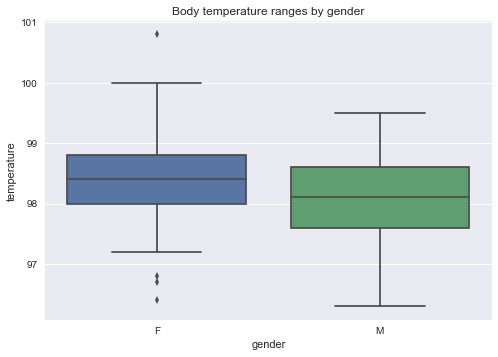

In [301]:
#Plot and examine the temperature data by sex.
sns.boxplot(x='gender', y='temperature', data=df)
plt.title('Body temperature ranges by gender')
plt.show()

The above boxplot each subpopulation are indicative of differences between men and women for body temperature. A more elaborate statistical test - such as through permutation replicates - should reveal whether this is a difference to believe in. Since we have distributions of data for each gender, in addition to their means, we can use permutation sampling of both to conclude whether resampling of each could lead to the patterns we see here or if the null hypothesis would hold true.

In [309]:
ft = df.temperature[df.gender == 'F']
mt = df.temperature[df.gender == 'M']
ft_m, mt_m = np.mean(ft), np.mean(mt)
n_ft, n_mt = len(ft), len(mt)
print("Mean female temperature:",ft_m, "Mean male temperature:",mt_m)
print("N for females:",n_ft,"and for males:",n_mt)

Mean female temperature: 98.39384615384613 Mean male temperature: 98.1046153846154
N for females: 65 and for males: 65


The means by gender are different. The population sample sizes for each gender are equal in size and large enough for frequentist statistical testing. First, however, we will look at permutation sampling of these populations.

In [308]:
#Permutation replicate functions.
def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data1, data2, func, size=1):
    perm_replicates = np.empty(size)
    for w in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data1, data2)
        perm_replicates[w] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

def mean_diff(data1, data2):
    diff_mean = np.mean(data1) - np.mean(data2)
    return diff_mean

#Applied to body temperatures by gender.
np.random.seed(75)
raw_diff_means = mean_diff(ft, mt)
perm_replicates = draw_perm_reps(ft, mt, mean_diff, size=10000)
p_gender = np.sum(perm_replicates >= raw_diff_means) / len(perm_replicates)
print("P-value for temperature by gender:",p_gender)

P-value for temperature by gender: 0.0141


The p-value = 0.0141 for the difference of body temperatures by gender, so with a threshold of p=0.05 we reject the null hypothesis that the two genders are indistinguishable for body temperature. This is not as high a threshold as in the previous analyses of human body temperature versus the usually reported "98.6 F", but it is still statistically significant. Next, a look at t-statistics on these sample distributions.

In [311]:
#t-statistic for gender-based temperature data distributions.
scipy.stats.ttest_ind(ft, mt)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

The t-statistic gives a higher p-value (0.024) than the permutation test did (p=0.014), but both tests meet a threshold for a p-value below 0.05, suggesting a slightly statistically significant and likely practically significant difference in mean body temperatures by gender.

# Conclusion

In conclusion, males and females show a statistically significant difference in mean body temperatures, while a mixed sample of humans shows a strongly statistically significant mean difference in body temperature from the widely reported value of "98.6 F". While the strengths of differences in each comparison here differ, both results show practical significance, as well. It is fundamentally useful to know that people should not be expected to necessarily exhibit a body temperature of 98.6 F, and in fact a normal temperature stands a good chance of being less than this number. This should form the foundation of better understanding of fevers and what is considered healthy, in addition to providing comfort to every person who has taken his/her temperature and wondered if the low reading meant he/she is abnormal.

Mean differences in gender for body temperature are significant enough that a new assignment of normal body temperature should be segregated into male and female categories, and patients should be assessed for body temperature in light of gender.

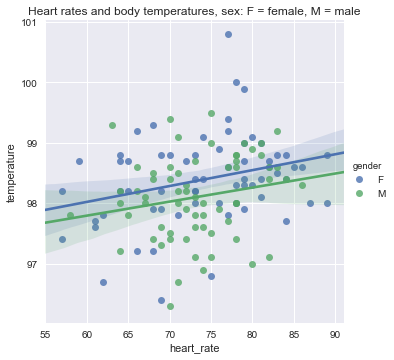

In [315]:
#Just for kicks.
sns.lmplot(x='heart_rate', y='temperature', data=df, hue='gender')
plt.title('Heart rates and body temperatures, sex: F = female, M = male')
plt.show()

There is possibly a trend with heart rate and body temperature. The split in body temperatures between genders exists throughout the range of heart rates.

In [320]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]
r = pearson_r(df.heart_rate, df.temperature)
print("Pearson correlation coefficient:",r)

Pearson correlation coefficient: 0.253656402721


The correlation coefficient is about 0.25, which is pretty low. There is a slight, visible positive trend between heart rate and body temperature, but the correlation between the two is pretty limited. 

In [323]:
np.random.seed(73)
perm_replicates = np.empty(10000)
for w in range(10000):
    temperature_perm = np.random.permutation(df.temperature)
    perm_replicates[w] = pearson_r(temperature_perm, df.heart_rate)
p_corr = np.sum(perm_replicates >= r) / len(perm_replicates)
print("p-value of correlation:",p_corr)

p-value of correlation: 0.0016


It looks like the relationship between temperature and heart rate is statistically significant with a p-value = 0.0016, but it is still a weak signal between the two variables with the correlation coefficient at 0.25.